In [29]:
import multiprocessing
import re
import time
from hazm import *
import pandas as pd
import numpy as np
from __future__ import unicode_literals
from pandas import DataFrame
from psutil import virtual_memory
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.manifold import TSNE

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [89]:
!python --version


Python 3.7.0


In [31]:
mem = virtual_memory()
cpu = multiprocessing.cpu_count()
print ("Free Memory:",mem.free)
print("Cpu Count:",cpu)



Free Memory: 10065330176
Cpu Count: 8


In [30]:
stopwords={'ات','اتفاقا','اجراست','احتمالا','احيانا','اخ','اختصارا'
               ,'اخر','اخرها','اخه','اخيرا','ادمهاست','اراسته','ارام','ارزانتر','ارزومندانه','ارنه','اره','از'
               ,'ازادانه','ازان','ازانجا','ازانجاكه','ازاين','ازاينرو','ازبه','ازجمله','ازروي','ازسر','ازش'
               ,'ازقبيل','ازلحاظ','ازنظر','ازو','ازيك','اساس','اساسا','اسان','اسانتر','اساني','است','استوارتر'
               ,'اسيبپذيرند','اش','اشان','اشتباها','اشفته','اشكار','اشكارا','اشكارتر','اشنايند','اصطلاحا','اصلا'
               ,'اصولا','اطلاعند','اغلب','افزودن','افسوس','افقي','اقل','اقلا','اقليت','اكتسابا','اكثر','اكثرا'
               ,'اكثريت','اكنون','الا','الاسف','الان','البته','الزاما','الظاهر','المقدور','الهي','الي','ام',
               'اما','امان','امرانه','امروز','امروزه','امسال','امشب','اميدوارم','اميدوارند','اميدواريم'
               ,'ان','انان','اناني','انجا','اند','اندك','اندكي','انرا','انشاالله','انقدر','انكس','انكه'
               ,'انم','انها','انهاست','انوقت','انچنان','انچه','انگار','انگاه','انگه','انگونه','اهان'
               ,'اهاي','او','اورد','اوردن','اوست','اول','اولا','اولش','اون','اونهمه','اوه','اويي','اي'
               ,'ايا','ايشان','ايم','اين','اينان','اينجا','اينجاست','اينجوري','اينرو','اينست','اينطور'
               ,'اينقدر','اينك','اينكه','اينها','اينهاست','اينهمه','اينو','اينچنين','اينگونه','اگاهانه'
               ,'اگر','اگرنه','اگرچه','اگه','ب','با','بااطمينان','باانكه','بااين','بااينكه','بار','باره'
               ,'بارها','بارهاوبارها','باز','بازانديشانه','بازهم','بازيگوشانه','باستثناي','باش','باشد'
               ,'باعلاقه','بالا','بالاتر','بالاخره','بالاخص','بالاست','بالاي','بالضرور','بالطبع','بالعكس',
               'بالقوه','بالله','بالنتيجه','بالنسبه','باهم','باوجود','باوجودانكه','باوجوداينكه',
               'باوجوديكه','باورند','بايد','بايستي','بتازگي','بتدريج','بتمامي','بجا','بجاي','بجز',
               'بخاطر','بخاطراينكه','بخردانه','بخشه','بخصوص','بخوبي','بد','بدان','بدانجا','بدانها',
               'بدبينانه','بدخواهانه','بدرستي','بدرشتي','بدلخواه','بدون','بدين','بدينجا','بدينسان',
               'بر','برا','براثر','براساس','براستي','بران','برانند','برانهاست','براي','برايت','برايش',
               'برايشان','برايم','برايمان','برحسب','برخلاف','برخوردارند','برخي','برداشتن','بردن','برروي',
               'برعكس','برغم','برمي','برنمي','برو','بروشني','برپا','بزعم','بزودي','بس','بسا','بسادگي','بسته',
               'بسختي','بسرعت','بسهولت','بسوي','بسي','بسيار','بسياري','بشان','بشدت','بصورت','بطبع','بطور',
               'بطوركلي','بطوري','بطوريكه','بعد','بعدا','بعداز','بعدازان','بعدازاين','بعدازظهر','بعدها',
               'بعدي','بعضي','بعضيشان','بعضيها','بعضيهاشان','بعضيهايشان','بعلاوه','بعيد','بفهمي','بقدري',
               'بكار','بكرات','بلادرنگ','بلافاصله','بلكه','بله','بمراتب','بموجب','بموقع','بنابراين','بنابه',
               'بناچار','بندرت','به','بهت','بهتر','بهرحال','بهش','بهيچ','بود','بودن','بوضوح','بويژه','بي',
               'بيرون','بيش','بيشتر','بين','بينابين','بيهوده','بيگمان','بپا','بگرمي','ت','تا','تاانجا'
               ,'تاانجاكه','تاانكه','تااينجا','تااينكه','تابه','تاجاييكه','تاحدودي','تاحدي','تازه','تازگي',
               'تاكنون','تاوقتي','تاوقتيكه','تحت','تدريج','تدريجا','تدريجي','تر','ترتيب','ترجيحا','ترديد',
               'ترند','تري','ترين','تصريحا','تعدادي','تعمدا','تفاوت','تفاوتند','تفنني','تقريبا','تك',
               'تلويحا','تمام','تماما','تمامشان','تمامي','تند','تنها','تنهايي','تنگاتنگ','تو','توسط',
               'تووما','توي','تويي','ث','ثالثا','ثاني','ثانيا','ج','جا','جاي','جايي','جبرگرايانه',
               'جدا','جدااز','جداازهم','جداگانه','جدي','جديدا','جرمزاست','جز','جزجز','جسورانه',
               'جلو','جلوتر','جلوي','جمع','جمعا','جمعي','جنابعالي','جنس','جهت','جور','جوري'
               ,'ح','حاشا','حاشاوكلا','حاشيه','حاضر','حاضرم','حاكيست','حال','حالا','حالكه',
               'حالي','حتما','حتي','حداقل','حداكثر','حدود','حرف','حسابي','حسابگرانه','حسب',
               'حضرتعالي','حقيرانه','حقيقتا','حكما','حكيمانه','حول','خ','خالص','خالصانه','خالي',
               'خام','خامسا','خب','خداحافظ','خداست','خداگونه','خردمندانه','خسته','خشمگين','خصمانه',
               'خصوصا','خلاقانه','خواسته','خواه','خواهد','خوب','خوبتر','خوبست','خوبي','خود','خوداند',
               'خوداگاهانه','خودبه','خودت','خودتان','خودتو','خودرا','خودش','خودشان','خودم','خودمان',
               'خودمختارانه','خودمو','خودنمايانه','خودي','خوش','خوشبختانه','خوشبينانه','خوشحال','خويش',
               'خويشتنم','خوگيرانه','خير','خيره','خيلي','د','دا','داام','دااما','داخل','دادن','دارا',
               'داراست','داراي','دارد','داشتن','داوطلبانه','دايم','دايما','دخترانه','دراثر','درازا',
               'درازاي','دران','دراين','درباب','درباره','دربدر','دربر','دربرابر','دربه','درتخت',
               'درثاني','درحال','درحالي','درحاليكه','دردكشان','درراستاي','درست','درسته','درشت',
               'درشتي','درصورتي','درصورتيكه','درطي','درعين','دركل','دركنار','درمجموع','درمقابل',
               'درمورد','درميان','درنتيجه','درنهايت','درهر','درهرحال','درهرصورت','درواقع','دريغ',
               'دريغا','درپي','دسته','دشمنيم','دشوار','دشوارتر','دقيق','دقيقا','دلخواه','دلخوش',
               'دلشاد','دم','دهد','دو','دوباره','دوتا','دوتادوتا','دور','دوراز','دورتر','دوساله',
               'دوستانه','دوم','دير','ديرت','ديرم','ديروز','ديروزبه','ديشب','ديوانه','ديوي','ديگر',
               'ديگران','ديگرتا','ديگري','ديگه','دگربار','دگرباره','دگرگون','ذ','ذاتا','ذالك',
               'ذيل','ذيلا','ر','را','رااز','رابه','راجع','راحت','راحتر','رادر','راسا','راست',
               'راستا','راستي','رسما','رشته','رغم','رفتارهاست','رنجند','رندانه','رهگشاست',
               'رو','رواست','روبرو','روبروست','روبه','روز','روزانه','روزبروز','روزمره',
               'روش','روشن','روشني','روي','رويش','رياكارانه','ريز','ريزان','ز','زد',
               'زدن','زده','زشت','زماني','زنند','زهي','زو','زود','زودتر','زودي',
               'زياد','زيادتر','زياده','زيبا','زيباتر','زير','زيرا','زيراكه',
               'زيركانه','زيرند','زيرچشمي','زين','س','سابقا','ساختن','ساده',
               'سادگي','سازان','سازهاست','سازي','سازگارانه','ساكنند','سالانه',
               'سالته','سالم','سالهاست','ساليانه','ساير','سايران','سايرين','ست'
               ,'سخت','سختتر','سخته','سر','سراسر','سرانجام','سراپا','سري','سريع'
               ,'سريعا','سعادتمندانه','سنگدلانه','سنگين','سه','سهوا','سوم','سياه',
               'سيخ','سپس','ش','شااالله','شاد','شادتر','شادمان','شاكله','شان','شاهدند'
               ,'شاهديم','شايد','شبانه','شبهاست','شتابان','شتابزده','شجاعانه','شخصا',
               'شد','شدت','شدن','شده','شديدا','شما','شماري','شماست','شمايند','شود',
               'شوراست','شوقم','شيرين','شيرينه','شيك','ص','صادقانه','صاف','صد','صدالبته',
               'صددرصد','صراحتا','صرفا','صريح','صريحا','صريحتر','صميمانه','صندوق','ض',
               'ضرورتا','ضعيف','ضعيفتر','ضمن','ضمنا','ط','طبعا','طبيعتا','طلبكارانه','طور',
               'طوري','طي','ظ','ظاهرا','ع','عاجزانه','عادلانه','عاقبت','عاقلانه','عالمانه',
               'عالي','عبارتند','عجب','عجولانه','عرفاني','عزيز','عقب','عقبتر','علاوه','علنا',
               'عليرغم','عليه','عمدا','عمدتا','عمده','عمدي','عملا','عملي','عملگرايانه','عموم',
               'عموما','عميقا','عن','عنقريب','عينا','غ','غالبا','غزالان','غير','غيراز','غيرازان',
               'غيرازاين','غيرتصادفي','غيرطبيعي','غيرعمدي','غيرمستقيم','غيريكسان','ف','فاقد',
               'فبها','فر','فراتر','فراتراز','فراوان','فردا','فعالانه','فعلا','فقط','فكورانه',
               'فلان','فلذا','فناورانه','فهرستوار','فورا','فوري','فوق','ق','قاالند','قابل',
               'قاطبه','قاطعانه','قاعدتا','قانونا','قبل','قبلا','قبلند','قد','قدر','قدرمسلم',
               'قدري','قرار','قراردادن','قريب','قضاياست','قطعا','قيلا','ك','كارافرينانه',
               'كاربرمدارانه','كارند','كاش','كاشكي','كاملا','كاملتر','كان','كاين','كجا','كجاست',
               'كدام','كدامند','كداميك','كرات','كرد','كردن','كرده','كز','كزين','كس','كساني','كسي',
               'كشيدن','كل','كلا','كلي','كليشه','كم','كمااينكه','كمابيش','كماكان','كمتر','كمتره','كمي',
               'كنار','كنارش','كنان','كنايه','كند','كنم','كنند','كننده','كه','كودكانه','كوركورانه'
               ,'كي','كيست','ل','لا','لااقل','لاجرم','لب','لذا','لزوما','لطفا','ليكن','م','ما',
               'مات','مادام','مادامي','ماداميكه','ماست','ماشينوار','ماقبل','مالا','مالامال','مامان',
               'مانند','ماهرانه','ماهيتا','مايي','مبادا','متاسفانه','متعاقبا','متفاوتند','متفكرانه',
               'متقابلا','متوالي','متوسفانه','مثابه','مثل','مثلا','مجبورند','مجددا','مجرمانه','مجموع',
               'مجموعا','محتاجند','محتاط','محتاطانه','محكم','مخالفند','مختصر','مختصرا','مخصوصا',
               'مدام','مداوم','مدبر','مدبرانه','مدتهاست','مدتي','مرا','مراتب','مرتب','مرتبا',
               'مردانه','مستحضريد','مستعد','مستقلا','مستقيم','مستقيما','مستمر','مستمرا',
               'مستند','مسلم','مسلما','مسيولانه','مشت','مشتركا','مشخص','مشغول','مشغولند',
               'مشكل','مشكلتر','مطلق','مطلقا','مطمانا','مطمانم','مطمنا','مع','معتقدم','معتقدند',
               'معتقديم','معدود','معذوريم','معلق','معلومه','معمولا','معمولي','مغرضانه','مغلوب',
               'مفيدند','مقدار','مقصر','مقصري','مقلوب','مكرر','مكررا','ملزم','مميزيهاست','من',
               'منتهي','منحصر','منحصرا','منحصربفرد','منصفانه','منطقا','منطقي','مني','مواجهند',
               'موجب','موجودند','موخر','مورد','موقعيكه','مي','ميان','ميزان','مگر','مگرانكه',
               'مگراينكه','ن','نااميد','نااگاهانه','ناتوان','ناخواسته','ناخوانده','ناديده'
               ,'ناراضي','ناسازگارانه','ناشناخته','ناكام','ناهشيار','ناپذير','ناچار'
               ,'ناگزير','ناگهان','نبايد','نبش','نتيجتا','نخست','نخودي','ندارد','ندرت',
               'ندرتا','نرم','نرمي','نزد','نزديك','نزديكتر','نسبت','نظرا','نظربه','نظير',
               'نفرند','نفهمي','نقادانه','نمي','نه','نهان','نهايت','نهايتا','نواورانه',
               'نوع','نوعا','نوميد','نيازمندانه','نيازمندند','نيز','نيست','نيك','نيمي',
               'ه','ها','هاست','هان','هايي','هدف','هر','هرازچندگاهي','هرانچه','هرجا'
               ,'هرزچندگاهي','هرساله','هرقدر','هركدام','هركس','هركسي','هركه','هروقت',
               'هرچقدر','هرچند','هرچه','هرگاه','هرگز','هرگونه','هزارها','هست','هستند'
               ,'هشيارانه','هق','هم','همان','همانا','همانطور','همانطوركه','همانطوري'
               ,'همانطوريكه','همانقدر','همانند','همانها','هماني','هماهنگتر','همخوان'
               ,'همدلانه','همديگر','همزمان','همسو','همسوبا','همكارانه','همنوا','همه'
               ,'همواره','همي','هميشه','هميشگي','همين','همينطور','همينطوركه','همينطوري'
               ,'همينطوريكه','همينكه','همچنان','همچنانكه','همچنين','همچون','همچين','همگام',
               'همگان','همگي','هنوز','هنگاميكه','هوشمندانه','هوشيارانه','هوي','هي','هيچ','هيچكدام',
               'هيچكس','هيچي','هيچيك','هيچگاه','هيچگونه','وابسته','واضح','واضحتر','واقع','واقعا','واقعي',
               'واقفند','واي','وجه','وجود','وجوديكه','وحشت','ور','ورا','وراي','وزو','وضوح','وقتي','وقتيكه'
               ,'ولي','وليكن','وهمين','وي','ويا','ويژه','وگر','وگرنه','يا','يااز','ياانكه','يااينكه','يابد','يارب'
               ,'يافتن','يعني','يقينا','يك','يكايك','يكبار','يكباره','يكجا','يكجانبه','يكجور','يكجوري','يكدم'
               ,'يكديگر','يكريز','يكزمان','يكسال','يكسره','يكسري','يكطرفه','يكنواخت','يكي','يكپارچه','يه'
               ,'يواش','پ','پارسال','پارسايانه','پاره','پايين','پدرانه','پدرپي','پديده','پذير','پذيرند'
               ,'پراكنده','پرتحرك','پرخاشگرانه','پرسان','پرشتاب','پرشور','پروردگارا','پريروز','پس','پشت'
               ,'پشتوانه','پشيموني','پنهان','پهن','پي','پيامبرانه','پيداست','پيدرپي','پيرامون','پيش'
               ,'پيشاپيش','پيشتر','پيوسته','پيگير','چ','چارده','چاله','چاپلوسانه','چت','چته','چرا'
               ,'چراكه','چطور','چقدر','چكار','چنان','چنانكه','چنانچه','چند','چندان','چنداني'
               ,'چندروزه','چندماهه','چندمين','چنده','چندين','چنين','چه','چهارهزار','چو','چون'
               ,'چي','چيز','چيزهاست','چيزيست','چيست','چيه','چگونه','ژ','گ','گاه','گاهي'
               ,'گذاران','گذاري','گذاشتن','گر','گرديد','گرفتارند','گرفتن','گرمي','گرنه'
               ,'گرچه','گفت','گمان','گهگاه','گونه','گويا','گويان','گويي','ابلهانه ها',
           
               'این','در','که','می','های','است','کرد' ,'برای'
           ,'شود'
           ,'آن'
           ,'وی'
           ,'نیز'
           ,'یک'
          
          }

def removeStopwords(text):
    regex = r"(?<!\d)[.,;:«»()،-](?!\d)"
    regex_number=r"\d+"
    regex_english=r"[a-zA-Z]+"
    subst=""
    #text=re.sub(regex, subst, text, 0)
    text=re.sub(regex_number,"",text,0)
    #text=re.sub(regex_english,"",text,0)
    words = []
    tokens = [word for word in text.split(' ') if word]
    for w in tokens:
        
        if w not in stopwords:
            
            words.append(w)
    return ' '.join(filter(lambda x: x.isalpha(), words))

def Load_Corpus(Normalize=True,RemoveStopWord=True,RemoveEnglishWord=True):
    new_data=pd.read_csv("Corpus_news.csv")
    normalizer = Normalizer()
    if Normalize==True:
        new_data['Content']=[normalizer.normalize(item) for item in new_data['Content']]
    if RemoveStopWord==True:
        new_data['Content']=[removeStopwords(item) for item in new_data['Content']]
    if RemoveEnglishWord==True:
        new_data['Content']=[re.sub("[a-zA-Z]+","",item) for item in new_data['Content']]
    return new_data


def plot_confusion_matrix(Y_test, Y_pred):
    conf_mat = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=Cat_count.index, yticklabels=Cat_count.index)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [102]:
precisions_micro = []
precisions_macro = []
recalls_micro = []
recalls_macro = []
f1s_micro = []
f1s_macro = []

In [32]:
start = datetime.datetime.now()
news_data=Load_Corpus(Normalize=True,RemoveStopWord=True,RemoveEnglishWord=True)
#news_data2=Load_Corpus(Normalize=True,RemoveStopWord=False,RemoveEnglishWord=True)
end = datetime.datetime.now()
print ("Time:{}".format(end-start))

Time:0:00:10.950338


## Remove Historey Data

In [34]:
news_data=news_data[news_data.Cat_Idx !=10 ]
#news_data2=news_data[news_data.Cat_Idx !=10 ]

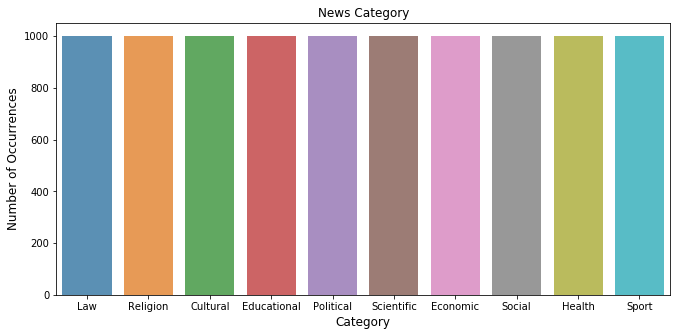

In [35]:
Cat_count=news_data['Cat'].value_counts()
Cat_count
plt.figure(figsize=(11,5))
sns.barplot(Cat_count.index, Cat_count.values, alpha=0.8)
plt.title(u'News Category')
plt.ylabel(u'Number of Occurrences', fontsize=12)
plt.xlabel(u'Category', fontsize=12)
plt.show()

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(news_data['Content'], news_data['Cat_Idx'], test_size=0.25,random_state=1)

## MultinomialNB TF

Best model: {'multinomial_nb__alpha': 0.5, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 3)}
Best score: 0.813200
Best test accuracy: 0.828000
Precision score: 0.828000 (micro) / 0.834406 (macro)
Recall score: 0.828000 (micro) / 0.829661 (macro)
F1 score: 0.828000 (micro) / 0.822319 (macro)


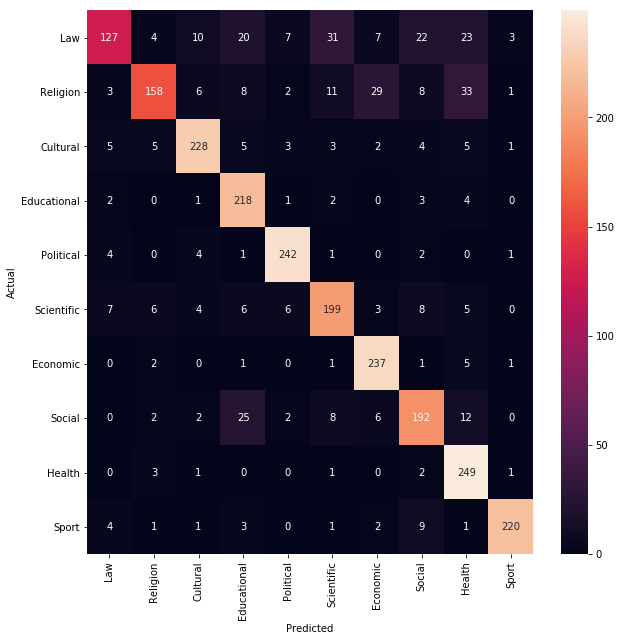

In [37]:
count_vectorizer = CountVectorizer()
multinomialNB = MultinomialNB()



# Define pipeline
mn_cv_nb_pipeline = Pipeline([('vectorizer', count_vectorizer),
                             ('multinomial_nb', multinomialNB)])

# Grid search parameters
mn_cv_nb_param_grid = [
    { 
        'vectorizer__min_df': [ 1 ],
        'vectorizer__ngram_range': [ (1,3) ],
        'multinomial_nb__alpha': [  0.5 ]
    }
]

# Perform grid search
mn_cv_nb_gs = GridSearchCV(estimator=mn_cv_nb_pipeline, param_grid=mn_cv_nb_param_grid, 
                           scoring='accuracy', cv=25, n_jobs=multiprocessing.cpu_count())

mn_cv_nb_gs.fit(X_train, Y_train)

# Create an instance of the best estimator
mn_cv_nb_best = mn_cv_nb_gs.best_estimator_
mn_cv_nb_best.fit(X_train, Y_train)

print('Best model: %s' % str(mn_cv_nb_gs.best_params_))
print('Best score: %f' % mn_cv_nb_gs.best_score_)
print('Best test accuracy: %f' % mn_cv_nb_best.score(X_test, Y_test))
mn_cv_nb_Y_pred = mn_cv_nb_best.predict(X_test)

# Compute precision, recall and F1 scores with micro and macro averaging
mn_cv_nb_precision_micro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_precision_macro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_recall_micro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_recall_macro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_f1_micro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_f1_macro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')

precisions_micro.append(mn_cv_nb_precision_micro)
precisions_macro.append(mn_cv_nb_precision_macro)
recalls_micro.append(mn_cv_nb_recall_micro)
recalls_macro.append(mn_cv_nb_recall_macro)
f1s_micro.append(mn_cv_nb_f1_micro)
f1s_macro.append(mn_cv_nb_f1_macro)

print('Precision score: %f (micro) / %f (macro)' % (mn_cv_nb_precision_micro, mn_cv_nb_precision_macro))
print('Recall score: %f (micro) / %f (macro)' % (mn_cv_nb_recall_micro, mn_cv_nb_recall_macro))
print('F1 score: %f (micro) / %f (macro)' % (mn_cv_nb_f1_micro, mn_cv_nb_f1_macro))

# Compute confusion matrix
#confusion_matrix(Y_test, mn_cv_nb_Y_pred)
plot_confusion_matrix(Y_test, mn_cv_nb_Y_pred)


## MultinomialNB TF-IDF

Best model: {'multinomial_nb__alpha': 0.5, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 3), 'vectorizer__norm': None}
Best score: 0.826800
Best test accuracy: 0.834000
Precision score: 0.834000 (micro) / 0.836473 (macro)
Recall score: 0.834000 (micro) / 0.835223 (macro)
F1 score: 0.834000 (micro) / 0.829738 (macro)


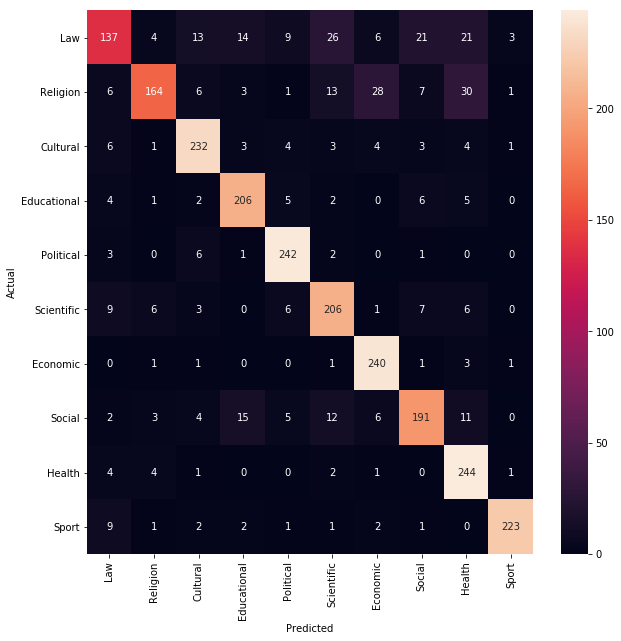

In [40]:
tfidf_vectorizer = TfidfVectorizer()
multinomialNB = MultinomialNB()

# Define pipeline
mn_tfidfv_nb_pipeline = Pipeline([('vectorizer', tfidf_vectorizer),
                             ('multinomial_nb', multinomialNB)])


mn_tfidfv_nb_param_grid = [
    { 
        'vectorizer__min_df': [ 1],
        'vectorizer__ngram_range': [  (1, 3) ],
        'vectorizer__norm': [ None ],
        
        'multinomial_nb__alpha': [0.5 ]
    }
]

# Perform grid search
mn_tfidfv_nb_gs = GridSearchCV(estimator=mn_tfidfv_nb_pipeline, param_grid=mn_tfidfv_nb_param_grid, 
                           scoring='accuracy', cv=25, n_jobs=multiprocessing.cpu_count())

mn_tfidfv_nb_gs.fit(X_train, Y_train)

# Create an instance of the best estimator
mn_tfidfv_nb_best = mn_tfidfv_nb_gs.best_estimator_
mn_tfidfv_nb_best.fit(X_train, Y_train)

print('Best model: %s' % str(mn_tfidfv_nb_gs.best_params_))
print('Best score: %f' % mn_tfidfv_nb_gs.best_score_)
print('Best test accuracy: %f' % mn_tfidfv_nb_best.score(X_test, Y_test))
mn_cv_nb_Y_pred = mn_tfidfv_nb_gs.predict(X_test)

# Compute precision, recall and F1 scores with micro and macro averaging
mn_cv_nb_precision_micro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_precision_macro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_recall_micro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_recall_macro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_f1_micro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_f1_macro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')

precisions_micro.append(mn_cv_nb_precision_micro)
precisions_macro.append(mn_cv_nb_precision_macro)
recalls_micro.append(mn_cv_nb_recall_micro)
recalls_macro.append(mn_cv_nb_recall_macro)
f1s_micro.append(mn_cv_nb_f1_micro)
f1s_macro.append(mn_cv_nb_f1_macro)

print('Precision score: %f (micro) / %f (macro)' % (mn_cv_nb_precision_micro, mn_cv_nb_precision_macro))
print('Recall score: %f (micro) / %f (macro)' % (mn_cv_nb_recall_micro, mn_cv_nb_recall_macro))
print('F1 score: %f (micro) / %f (macro)' % (mn_cv_nb_f1_micro, mn_cv_nb_f1_macro))

# Compute confusion matrix
#confusion_matrix(Y_test, mn_cv_nb_Y_pred)
plot_confusion_matrix(Y_test, mn_cv_nb_Y_pred)




## GaussianNB TF-IDF

0.58
Best test accuracy: 0.580000
Precision score: 0.580000 (micro) / 0.583903 (macro)
Recall score: 0.580000 (micro) / 0.581826 (macro)
F1 score: 0.580000 (micro) / 0.577923 (macro)


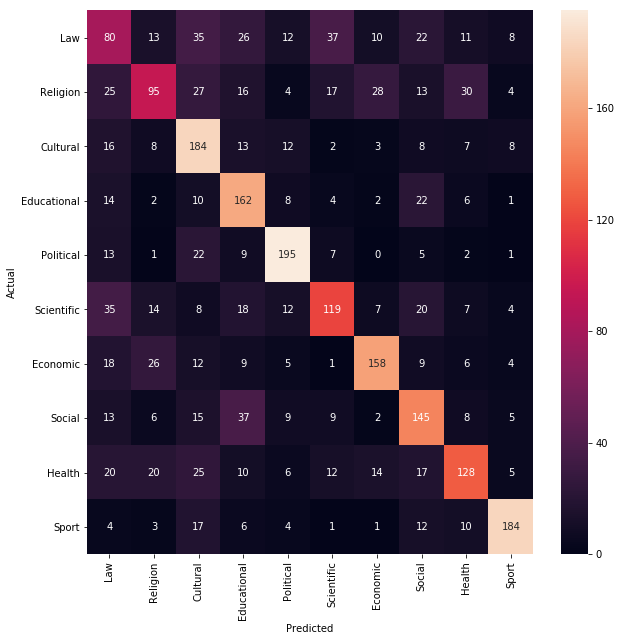

In [67]:

gnb = GaussianNB()
count_vectorizer = CountVectorizer()

v = TfidfVectorizer(ngram_range=(1,1))  
x = v.fit_transform(X_train.astype('U')).toarray()



gnb.fit(x,Y_train)
xtest = v.transform(X_test.astype('U')).toarray()
y_pred=gnb.predict(xtest)
yscore=gnb.score(xtest,Y_test)
print(yscore)



print('Best test accuracy: %f' % yscore)
mn_cv_nb_Y_pred = gnb.predict(xtest)

# Compute precision, recall and F1 scores with micro and macro averaging
mn_cv_nb_precision_micro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_precision_macro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_recall_micro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_recall_macro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_f1_micro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_f1_macro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')

precisions_micro.append(mn_cv_nb_precision_micro)
precisions_macro.append(mn_cv_nb_precision_macro)
recalls_micro.append(mn_cv_nb_recall_micro)
recalls_macro.append(mn_cv_nb_recall_macro)
f1s_micro.append(mn_cv_nb_f1_micro)
f1s_macro.append(mn_cv_nb_f1_macro)

print('Precision score: %f (micro) / %f (macro)' % (mn_cv_nb_precision_micro, mn_cv_nb_precision_macro))
print('Recall score: %f (micro) / %f (macro)' % (mn_cv_nb_recall_micro, mn_cv_nb_recall_macro))
print('F1 score: %f (micro) / %f (macro)' % (mn_cv_nb_f1_micro, mn_cv_nb_f1_macro))

# Compute confusion matrix
#confusion_matrix(Y_test, mn_cv_nb_Y_pred)
plot_confusion_matrix(Y_test, mn_cv_nb_Y_pred)



## GaussianNB TF

0.5924
Best test accuracy: 0.592400
Precision score: 0.592400 (micro) / 0.591833 (macro)
Recall score: 0.592400 (micro) / 0.593921 (macro)
F1 score: 0.592400 (micro) / 0.590132 (macro)


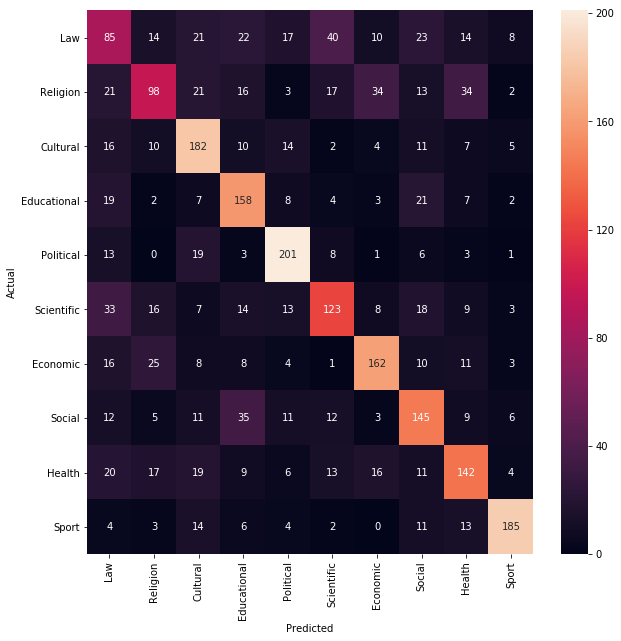

In [71]:

gnb = GaussianNB()
v = CountVectorizer(ngram_range=(1,1))

#v = TfidfVectorizer(ngram_range=(1,1))  
x = v.fit_transform(X_train.astype('U')).toarray()



gnb.fit(x,Y_train)
xtest = v.transform(X_test.astype('U')).toarray()
y_pred=gnb.predict(xtest)
yscore=gnb.score(xtest,Y_test)
print(yscore)



print('Best test accuracy: %f' % yscore)
mn_cv_nb_Y_pred = gnb.predict(xtest)

# Compute precision, recall and F1 scores with micro and macro averaging
mn_cv_nb_precision_micro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_precision_macro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_recall_micro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_recall_macro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_f1_micro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_f1_macro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')

precisions_micro.append(mn_cv_nb_precision_micro)
precisions_macro.append(mn_cv_nb_precision_macro)
recalls_micro.append(mn_cv_nb_recall_micro)
recalls_macro.append(mn_cv_nb_recall_macro)
f1s_micro.append(mn_cv_nb_f1_micro)
f1s_macro.append(mn_cv_nb_f1_macro)

print('Precision score: %f (micro) / %f (macro)' % (mn_cv_nb_precision_micro, mn_cv_nb_precision_macro))
print('Recall score: %f (micro) / %f (macro)' % (mn_cv_nb_recall_micro, mn_cv_nb_recall_macro))
print('F1 score: %f (micro) / %f (macro)' % (mn_cv_nb_f1_micro, mn_cv_nb_f1_macro))

# Compute confusion matrix
#confusion_matrix(Y_test, mn_cv_nb_Y_pred)
plot_confusion_matrix(Y_test, mn_cv_nb_Y_pred)



## BernoulliNB TF

d:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
d:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best model: {'Bernoulli_nb__alpha': 0, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 2)}
Best score: 0.790800
Best test accuracy: 0.803600
Precision score: 0.803600 (micro) / 0.801278 (macro)
Recall score: 0.803600 (micro) / 0.805042 (macro)
F1 score: 0.803600 (micro) / 0.798569 (macro)


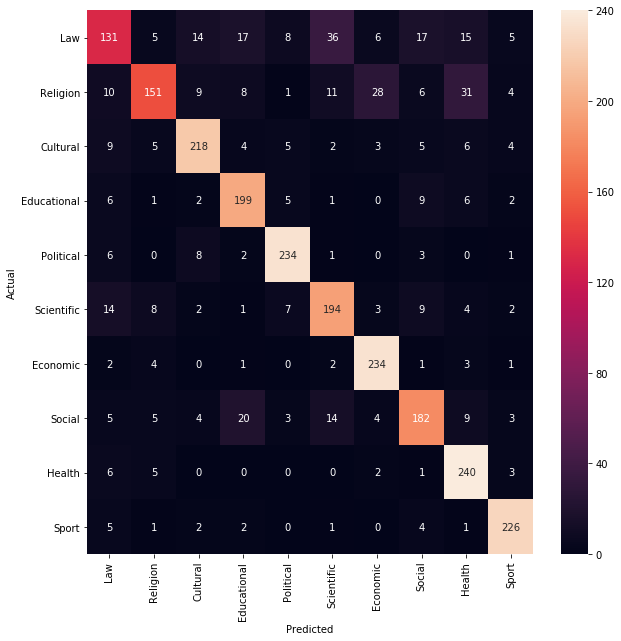

In [85]:
from sklearn.naive_bayes import BernoulliNB
count_vectorizer = CountVectorizer()
BernoulliNB = BernoulliNB()



# Define pipeline
mn_cv_nb_pipeline = Pipeline([('vectorizer', count_vectorizer),
                             ('Bernoulli_nb', BernoulliNB)])

# Grid search parameters
mn_cv_nb_param_grid = [
    { 
        'vectorizer__min_df': [ 1 ],
        'vectorizer__ngram_range': [ (1,2)],
        'Bernoulli_nb__alpha':[0]
        
    }
]

# Perform grid search
mn_cv_nb_gs = GridSearchCV(estimator=mn_cv_nb_pipeline, param_grid=mn_cv_nb_param_grid, 
                           scoring='accuracy', cv=25, n_jobs=multiprocessing.cpu_count())

mn_cv_nb_gs.fit(X_train, Y_train)

# Create an instance of the best estimator
mn_cv_nb_best = mn_cv_nb_gs.best_estimator_
mn_cv_nb_best.fit(X_train, Y_train)

print('Best model: %s' % str(mn_cv_nb_gs.best_params_))
print('Best score: %f' % mn_cv_nb_gs.best_score_)
print('Best test accuracy: %f' % mn_cv_nb_best.score(X_test, Y_test))
mn_cv_nb_Y_pred = mn_cv_nb_best.predict(X_test)

# Compute precision, recall and F1 scores with micro and macro averaging
mn_cv_nb_precision_micro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_precision_macro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_recall_micro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_recall_macro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_f1_micro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_f1_macro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')

precisions_micro.append(mn_cv_nb_precision_micro)
precisions_macro.append(mn_cv_nb_precision_macro)
recalls_micro.append(mn_cv_nb_recall_micro)
recalls_macro.append(mn_cv_nb_recall_macro)
f1s_micro.append(mn_cv_nb_f1_micro)
f1s_macro.append(mn_cv_nb_f1_macro)

print('Precision score: %f (micro) / %f (macro)' % (mn_cv_nb_precision_micro, mn_cv_nb_precision_macro))
print('Recall score: %f (micro) / %f (macro)' % (mn_cv_nb_recall_micro, mn_cv_nb_recall_macro))
print('F1 score: %f (micro) / %f (macro)' % (mn_cv_nb_f1_micro, mn_cv_nb_f1_macro))

# Compute confusion matrix
#confusion_matrix(Y_test, mn_cv_nb_Y_pred)
plot_confusion_matrix(Y_test, mn_cv_nb_Y_pred)



## BernoulliNB TF-IDF

d:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
d:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best model: {'Bernoulli_nb__alpha': 0, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 3), 'vectorizer__norm': None}
Best score: 0.810667
Best test accuracy: 0.818800
Precision score: 0.818800 (micro) / 0.818432 (macro)
Recall score: 0.818800 (micro) / 0.819831 (macro)
F1 score: 0.818800 (micro) / 0.815108 (macro)


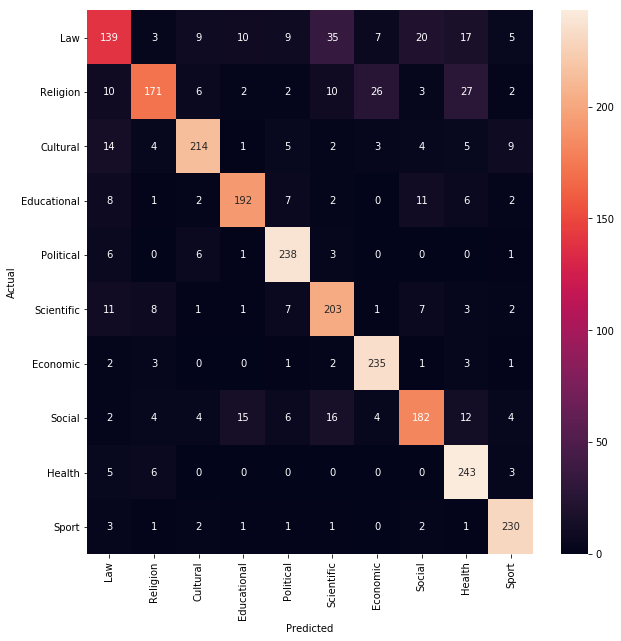

In [84]:

tfidf_vectorizer = TfidfVectorizer()
BernoulliNB = BernoulliNB()

# Define pipeline
mn_tfidfv_nb_pipeline = Pipeline([('vectorizer', tfidf_vectorizer),
                            ('Bernoulli_nb', BernoulliNB)])


mn_tfidfv_nb_param_grid = [
    { 
        'vectorizer__min_df': [ 1,2],
        'vectorizer__ngram_range': [ (1,2), (1, 3) ],
        'vectorizer__norm': [ None ],
        
        'Bernoulli_nb__alpha': [0,1.0 ]
    }
]

# Perform grid search
mn_tfidfv_nb_gs = GridSearchCV(estimator=mn_tfidfv_nb_pipeline, param_grid=mn_tfidfv_nb_param_grid, 
                           scoring='accuracy', cv=25, n_jobs=multiprocessing.cpu_count())

mn_tfidfv_nb_gs.fit(X_train, Y_train)

# Create an instance of the best estimator
mn_tfidfv_nb_best = mn_tfidfv_nb_gs.best_estimator_
mn_tfidfv_nb_best.fit(X_train, Y_train)

print('Best model: %s' % str(mn_tfidfv_nb_gs.best_params_))
print('Best score: %f' % mn_tfidfv_nb_gs.best_score_)
print('Best test accuracy: %f' % mn_tfidfv_nb_best.score(X_test, Y_test))
mn_cv_nb_Y_pred = mn_tfidfv_nb_gs.predict(X_test)

# Compute precision, recall and F1 scores with micro and macro averaging
mn_cv_nb_precision_micro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_precision_macro = precision_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_recall_micro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_recall_macro = recall_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')
mn_cv_nb_f1_micro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='micro')
mn_cv_nb_f1_macro = f1_score(y_true=Y_test, y_pred=mn_cv_nb_Y_pred, average='macro')

precisions_micro.append(mn_cv_nb_precision_micro)
precisions_macro.append(mn_cv_nb_precision_macro)
recalls_micro.append(mn_cv_nb_recall_micro)
recalls_macro.append(mn_cv_nb_recall_macro)
f1s_micro.append(mn_cv_nb_f1_micro)
f1s_macro.append(mn_cv_nb_f1_macro)

print('Precision score: %f (micro) / %f (macro)' % (mn_cv_nb_precision_micro, mn_cv_nb_precision_macro))
print('Recall score: %f (micro) / %f (macro)' % (mn_cv_nb_recall_micro, mn_cv_nb_recall_macro))
print('F1 score: %f (micro) / %f (macro)' % (mn_cv_nb_f1_micro, mn_cv_nb_f1_macro))

# Compute confusion matrix
#confusion_matrix(Y_test, mn_cv_nb_Y_pred)
plot_confusion_matrix(Y_test, mn_cv_nb_Y_pred)



## Support Vector Machines

In [90]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#Create tagged documents
news_tagged_documents = []

for i, document in enumerate(news_data['Content']):
    news_tagged_documents.append(TaggedDocument(document.split(' '), [i]))
# Train Doc2Vec
doc2vec_vector_size = 50

doc2vec_model = Doc2Vec(documents=news_tagged_documents, size=doc2vec_vector_size, window=3, 
                        min_count=2, iter=30, workers=multiprocessing.cpu_count())
doc2vec_model.init_sims(replace=False)

# Vectorize documents and split the whole corpus in train and test sets
news_vectors = []

for document in news_data['Content']:
    news_vectors.append(doc2vec_model.infer_vector(document.split(' ')))

d2v_X_train, d2v_X_test, d2v_Y_train, d2v_Y_test = train_test_split(news_vectors, news_data['Cat_Idx'], test_size=0.25) 

d:\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
d:\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
d:\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [94]:
scaler = StandardScaler()
svc = SVC()

# Define pipeline
svc_d2v_pipeline = Pipeline([('scaler', scaler),
                             ('svc', svc)])

# Grid search parameters
svc_d2v_param_grid = [
    { 
        'svc__kernel': [ 'linear' ],
        'svc__C': [0.5, 1.0, 5.0, 10.0 ]
    },
    { 
        'svc__kernel': [ 'poly' ],
        'svc__C': [0.5, 1.0, 5.0, 10.0 ]
    },
    { 
        'svc__kernel': [ 'rbf' ],
        'svc__C': [0.5, 1.0, 5.0, 10.0 ]
    }
]
# Perform grid search
svc_d2v_gs = GridSearchCV(estimator=svc_d2v_pipeline, param_grid=svc_d2v_param_grid, 
                           scoring='accuracy', cv=25, n_jobs=multiprocessing.cpu_count())

svc_d2v_gs.fit(d2v_X_train, d2v_Y_train)

# Create an instance of the best estimator
svc_d2v_best = svc_d2v_gs.best_estimator_
svc_d2v_best.fit(d2v_X_train, d2v_Y_train)

print('Best model: %s' % str(svc_d2v_gs.best_params_))
print('Best score: %f' % svc_d2v_gs.best_score_)
svc_d2v_Y_pred = svc_d2v_best.predict(d2v_X_test)


Best model: {'svc__C': 1.0, 'svc__kernel': 'rbf'}
Best score: 0.773200


Precision score: 0.769600 (micro) / 0.767363 (macro)
Recall score: 0.769600 (micro) / 0.771154 (macro)
F1 score: 0.769600 (micro) / 0.768506 (macro)


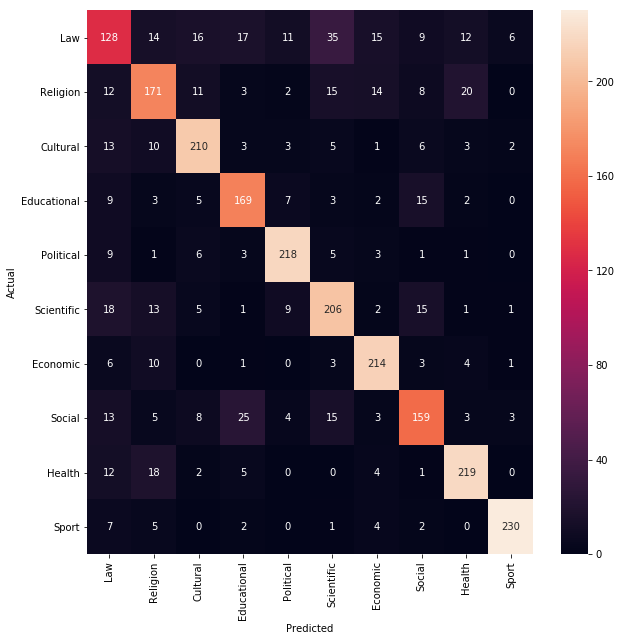

In [92]:
svc_d2v_Y_pred = svc_d2v_best.predict(d2v_X_test)

# Compute precision, recall and F1 scores with micro and macro averaging
svc_d2v_precision_micro = precision_score(y_true=d2v_Y_test, y_pred=svc_d2v_Y_pred, average='micro')
svc_d2v_precision_macro = precision_score(y_true=d2v_Y_test, y_pred=svc_d2v_Y_pred, average='macro')
svc_d2v_recall_micro = recall_score(y_true=d2v_Y_test, y_pred=svc_d2v_Y_pred, average='micro')
svc_d2v_recall_macro = recall_score(y_true=d2v_Y_test, y_pred=svc_d2v_Y_pred, average='macro')
svc_d2v_f1_micro = f1_score(y_true=d2v_Y_test, y_pred=svc_d2v_Y_pred, average='micro')
svc_d2v_f1_macro = f1_score(y_true=d2v_Y_test, y_pred=svc_d2v_Y_pred, average='macro')

precisions_micro.append(svc_d2v_precision_micro)
precisions_macro.append(svc_d2v_precision_macro)
recalls_micro.append(svc_d2v_recall_micro)
recalls_macro.append(svc_d2v_recall_macro)
f1s_micro.append(svc_d2v_f1_micro)
f1s_macro.append(svc_d2v_f1_macro)

print('Precision score: %f (micro) / %f (macro)' % (svc_d2v_precision_micro, svc_d2v_precision_macro))
print('Recall score: %f (micro) / %f (macro)' % (svc_d2v_recall_micro, svc_d2v_recall_macro))
print('F1 score: %f (micro) / %f (macro)' % (svc_d2v_f1_micro, svc_d2v_f1_macro))

# Compute confusion matrix
plot_confusion_matrix(d2v_Y_test, svc_d2v_Y_pred)



## Performance comparison

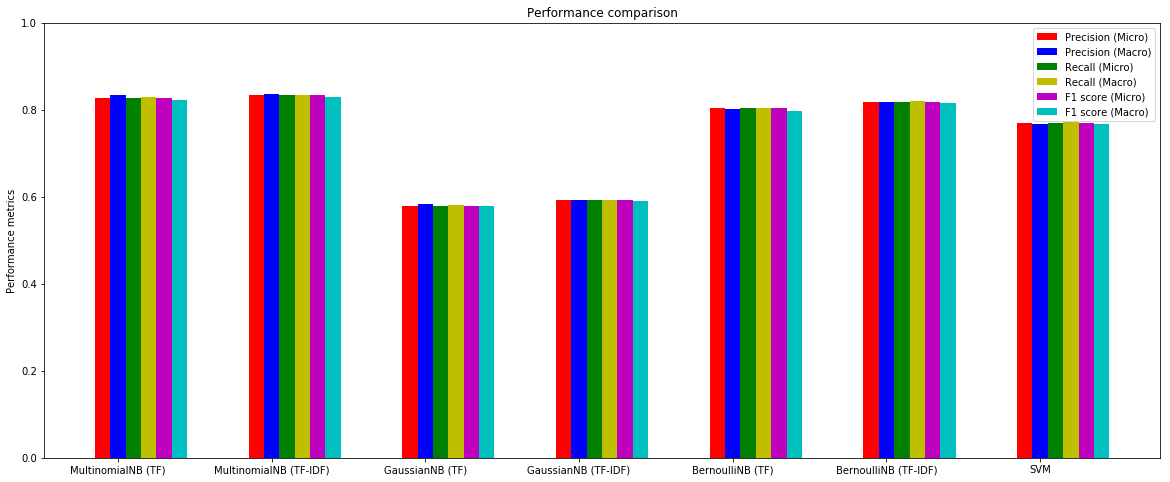

In [131]:
cmp_fig, cmp_ax = subplots(figsize=(20.0, 8.0))

pmicro = cmp_ax.bar(arange(7), precisions_micro, 0.1, color='r')
pmacro = cmp_ax.bar(arange(7) + 0.1, precisions_macro, 0.1, color='b')
rmicro = cmp_ax.bar(arange(7) + (2 * 0.1), recalls_micro, 0.1, color='g')
rmacro = cmp_ax.bar(arange(7) + (3 * 0.1), recalls_macro, 0.1, color='y')
f1micro = cmp_ax.bar(arange(7) + (4 * 0.1), f1s_micro, 0.1, color='m')
f1macro = cmp_ax.bar(arange(7) + (5 * 0.1), f1s_macro, 0.1, color='c')

cmp_ax.set_ylabel('Performance metrics')
cmp_ax.set_title('Performance comparison')

cmp_ax.set_xticks(arange(7) + 0.1)
cmp_ax.set_ylim([0.0, 1.0])

cmp_ax.set_xticklabels(('MultinomialNB (TF)', 'MultinomialNB (TF-IDF)',
                        'GaussianNB (TF)', 'GaussianNB (TF-IDF)'
                        ,'BernoulliNB (TF)','BernoulliNB (TF-IDF)',
                       'SVM'))

cmp_ax.legend((pmicro[0], pmacro[0], rmicro[0], rmacro[0], f1micro[0], f1macro[0]), 
              ('Precision (Micro)', 'Precision (Macro)',
               'Recall (Micro)', 'Recall (Macro)',
               'F1 score (Micro)', 'F1 score (Macro)'))